### Anatomical Similarity Comparison

The goal of this analysis is to check whether the increased ISC - in total or in part - could be driven by anatomical similarities. The reason for this is that twins also 'look alike', and their brains look alike (need to find some literature on that). Thus, normalization etc. should also be better for twins compared to non-twins. Given that we are operating at the level of regions (parcellation), the influence of microstructural differences should not matter that much, but it is still a potential confound we need to take serious.

#### Import modules

In [11]:
import pandas as pd
import os, itertools, random
import numpy as np
import sys
sys.path.insert(1, '../')
from nilearn.masking import compute_brain_mask
from nilearn import image
from nilearn.masking import apply_mask 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from timeit import default_timer as timer
import warnings
warnings.simplefilter("ignore")

In [2]:
twin_df = pd.read_csv('../../data/00_dataset_info/twin_df.csv')

twin_list = twin_df[['twin_A_id','twin_B_id']].values.tolist()
print(twin_list[:3])

twin_df.head()

[['sub-0001', 'sub-0018'], ['sub-0003', 'sub-0233'], ['sub-0004', 'sub-0420']]


,Unnamed: 0,family_id,twin_A_id,twin_A_age,twin_A_sex,twin_B_id,twin_B_age,twin_B_sex
0,0,fam-0001,sub-0001,14.0,M,sub-0018,14.0,M
1,1,fam-0116,sub-0003,14.0,M,sub-0233,14.0,F
2,2,fam-0002,sub-0004,11.0,M,sub-0420,11.0,M
3,3,fam-0088,sub-0005,12.0,F,sub-0178,12.0,F
4,4,fam-0178,sub-0006,15.0,M,sub-0329,15.0,F


In [5]:
# if data have been precomputed and you just want to load them without the lengthy process, comment out this and the next cell

n_twins   = len(twin_list)

#iscs_reg_twin   = np.zeros((n_twins))
#iscs_reg_notwin = np.zeros(( 2 * n_twins))

start = timer()

twin_iscs         = []
no_twin_iscs      = []

for twin_pair in twin_list:
    
    
    file_a = twin_pair[0]
    file_b = twin_pair[1] 
    print(file_a)
    print(file_b)
    #print('---')
    
    f1 = '../../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
    f1m = '../../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
    f1_masked = apply_mask(f1, compute_brain_mask(f1m, threshold=0.01, mask_type='whole-brain'))

    f2 = '../../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
    f2m = '../../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
    f2_masked = apply_mask(f2, compute_brain_mask(f2m, threshold=0.01, mask_type='whole-brain'))

    #print(f1_masked.shape)
    #print(f2_masked.shape)
    
    
    #print(np.corrcoef(f1_masked, f2_masked)[0,1])
    
    
    twin_iscs.append(np.corrcoef(f1_masked, f2_masked)[0,1])

    
    # now, do the same for a non-twin pair
    all_subs = list(itertools.chain(*twin_list))

    
    #from the remaining people, randomly chose one
    other_people = [x for x in all_subs if x != twin_pair[0]]  #exclude the current ones to avoid biasing the results
    file_b_control =  random.choice(other_people)
    #print('random other: ' + file_b_control)
    
    f2_control  = '../../data/04_anatomy/' + file_b_control + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
    f2m_control = '../../data/04_anatomy/' + file_b_control + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
    f2_masked_control = apply_mask(f2_control, compute_brain_mask(f2m_control, threshold=0.01, mask_type='whole-brain'))

    #print(np.corrcoef(f1_masked, f2_masked_control)[0,1])
    no_twin_iscs.append(np.corrcoef(f1_masked, f2_masked_control)[0,1])
    

    #also for the other twin -- again to avoid biasing 
    other_people = [x for x in all_subs if x != twin_pair[1]]  #exclude the current ones to avoid biasing the results
    file_a_control =  random.choice(other_people)
    #print('random other: ' + file_a_control)
    
    f1_control  = '../../data/04_anatomy/' + file_a_control + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
    f1m_control = '../../data/04_anatomy/' + file_a_control + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
    f1_masked_control = apply_mask(f1_control, compute_brain_mask(f1m_control, threshold=0.01, mask_type='whole-brain'))

    #print(np.corrcoef(f1_masked_control, f2_masked)[0,1])
    no_twin_iscs.append(np.corrcoef(f1_masked_control, f2_masked)[0,1])
    
    #print('done')
    end = timer()
    print(end - start)



sub-0001
sub-0018
20.10807479202049
sub-0003
sub-0233
40.03388112501125
sub-0004
sub-0420
59.98270979200606
sub-0005
sub-0178
79.94472483400023
sub-0006
sub-0329
99.99650958401617
sub-0007
sub-0048
120.09614087501541
sub-0010
sub-0036
140.48105829200358
sub-0013
sub-0261
160.7974084590096
sub-0015
sub-0171
180.76595083400025
sub-0016
sub-0183
200.9134622090205
sub-0017
sub-0059
221.1505318340205
sub-0019
sub-0213
241.39814262499567
sub-0020
sub-0310
261.4543591249967
sub-0021
sub-0372
281.5408070840058
sub-0024
sub-0073
301.5698858750111
sub-0028
sub-0408
321.62605675001396
sub-0031
sub-0161
341.6908794589981
sub-0032
sub-0223
361.52697045900277
sub-0037
sub-0078
381.5996426670172
sub-0038
sub-0272
401.57420404200093
sub-0041
sub-0292
421.68754287500633
sub-0042
sub-0182
441.76664370900835
sub-0043
sub-0279
461.78088345899596
sub-0047
sub-0188
481.7705535000132
sub-0049
sub-0170
501.76897587502026
sub-0050
sub-0284
521.7790673749987
sub-0051
sub-0086
541.763264417008
sub-0053
sub-0242


In [7]:
df1 = pd.DataFrame(np.vstack(( no_twin_iscs, 
                   len(no_twin_iscs) * ['no twin'] )).T, 
                   columns = ['Anatomy Similarity','Twin Status'])

df2 = pd.DataFrame(np.vstack(( twin_iscs, 
                   len(twin_iscs) * ['twin'] )).T, 
                   columns = ['Anatomy Similarity','Twin Status'])
result_df = pd.concat([df2, df1])
del df1, df2

result_df['Anatomy Similarity'] = result_df['Anatomy Similarity'].astype('float')
#result_df.head()


result_df.to_csv('../../data/05_results/anatomy_similarity_df.csv')


In [8]:
# if data have been precomputed, to save time, you can just load them here

# result_df = pd.read_csv('../data/05_results/anatomy_similarity_df.csv')
# result_df.head()

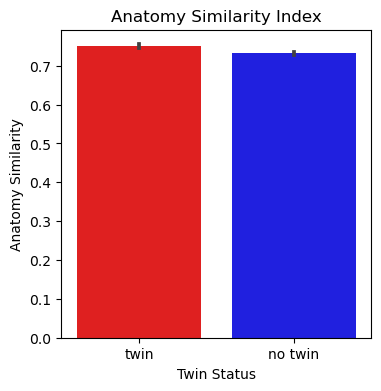

In [12]:
plt.figure(figsize =  (4,4))
sns.barplot(data=result_df, 
            x="Twin Status", 
            y="Anatomy Similarity",
            palette = [ 'red', 'blue']).set(title='Anatomy Similarity Index');
